In [2]:
import pandas as pd

df = pd.read_csv('data/dataset_20240513.csv')
df.head()

,O,N,B,S,P,Specific surface area,Smicro,Smeso,Smicro/SSA,Pore volume,...,Vmeso,Vmicro/Vt,Dap,ID/IG,Electrolyte,Current collector,Active mass loading,Potential window,Current density,Specific capacity
0,7.15,3.52,0.00,0.0,0.0,1546.1,NaN,NaN,NaN,0.5753,...,0.03714,0.939857,1.488390,1.029,2M ZnSO4,Carbon cloth,1.0,1.6,0.10,85.0
1,8.12,3.79,3.66,0.0,0.0,1315.2,NaN,NaN,NaN,0.5116,...,0.05106,0.931392,1.555961,1.038,2M ZnSO4,Carbon cloth,1.0,1.6,0.10,114.0
2,21.55,3.29,0.00,0.0,0.0,1140.8,341.3,799.5,0.299176,0.8600,...,0.68000,0.209302,3.015428,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.10,90.2
3,21.55,3.29,0.00,0.0,0.0,1140.8,341.3,799.5,0.299176,0.8600,...,0.68000,0.209302,3.015428,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.25,86.3
4,21.55,3.29,0.00,0.0,0.0,1140.8,341.3,799.5,0.299176,0.8600,...,0.68000,0.209302,3.015428,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.50,79.9


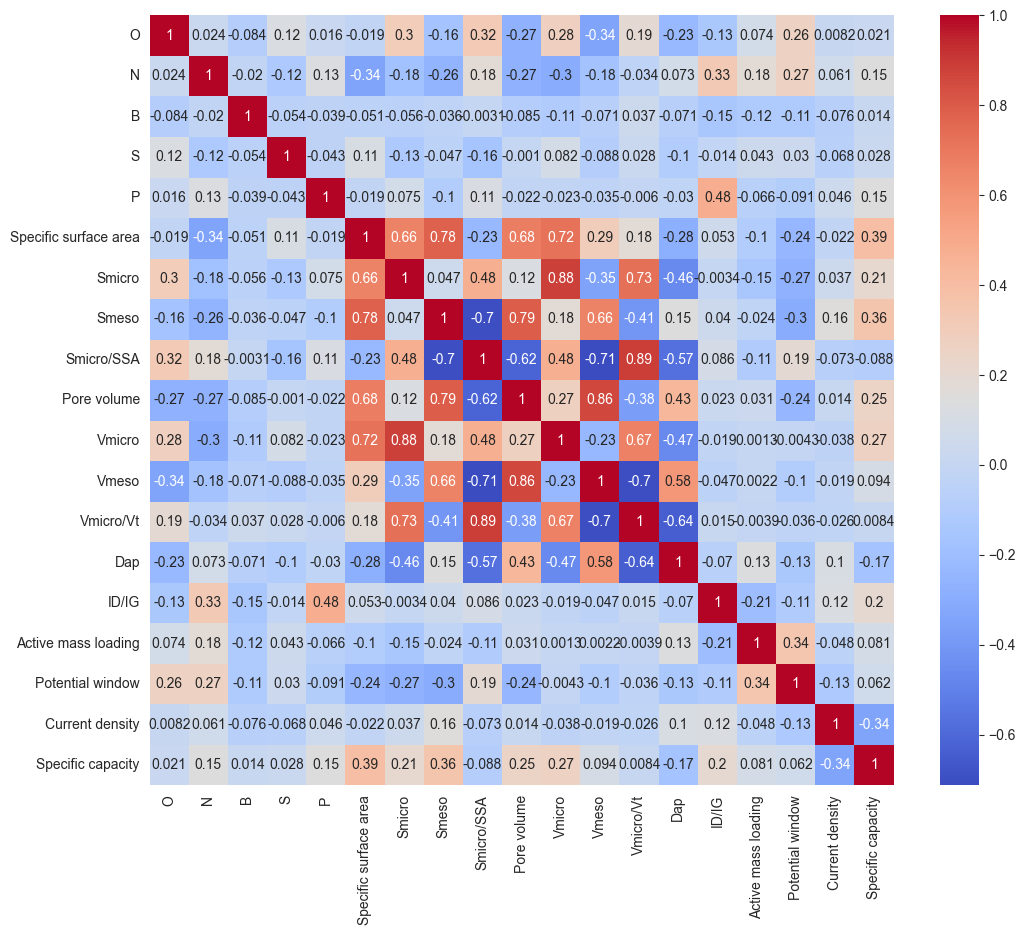

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.drop(['Electrolyte', 'Current collector'], axis=1)
# 计算相关系数
corr = df.corr()

# 创建一个新的matplotlib图像
plt.figure(figsize=(12,10))

# 生成热力图
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.savefig('output/figures/pearson_corr.png', dpi=300, bbox_inches='tight')

# 显示图像
plt.show()

In [4]:
# 找出相关系数大于0.8的特征对
highly_correlated_features = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.75:
            colname1 = corr.columns[i]
            colname2 = corr.columns[j]
            highly_correlated_features.append((colname1, colname2))

print(highly_correlated_features)

[('Smeso', 'Specific surface area'), ('Pore volume', 'Smeso'), ('Vmicro', 'Smicro'), ('Vmeso', 'Pore volume'), ('Vmicro/Vt', 'Smicro/SSA')]


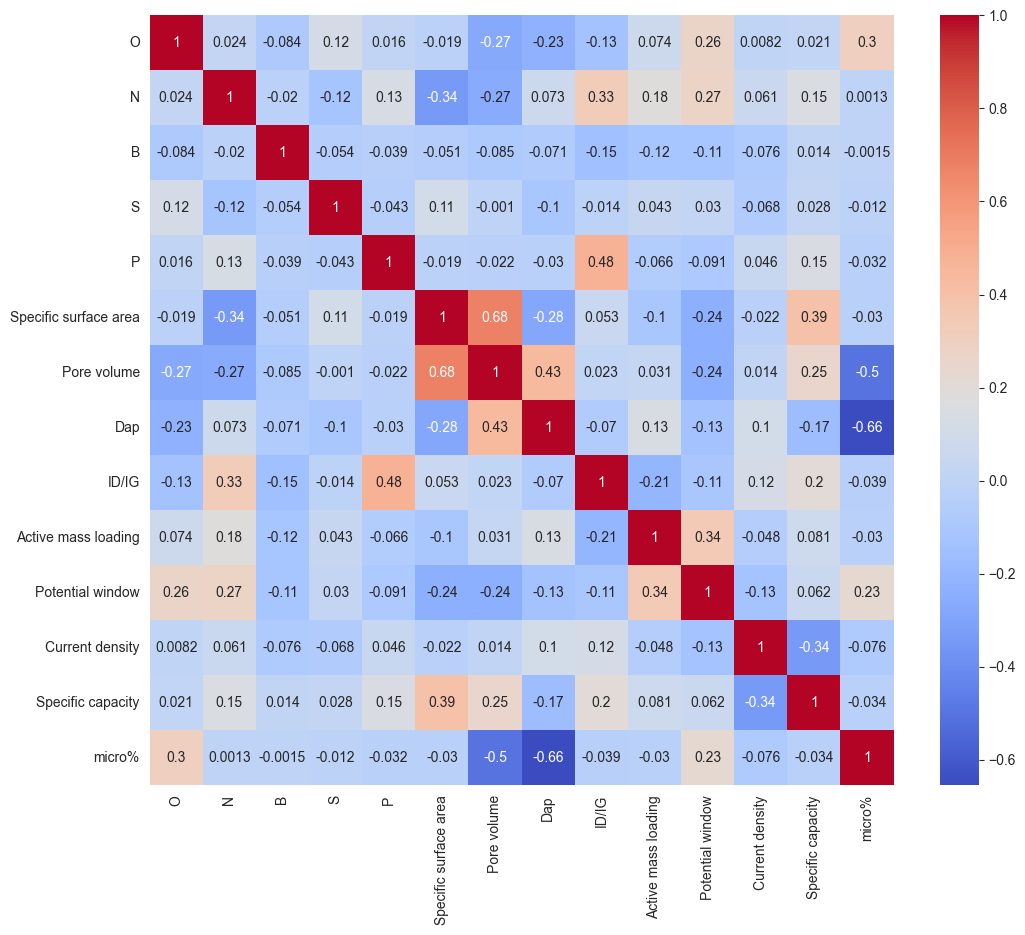

In [10]:
df_1 = pd.read_csv('data/dataset_1.csv')
df_1 = df_1.drop(['Electrolyte', 'Current collector'], axis=1)
# 计算相关系数
corr_1 = df_1.corr()

# 创建一个新的matplotlib图像
plt.figure(figsize=(12,10))

# 生成热力图
sns.heatmap(corr_1, annot=True, cmap='coolwarm')

plt.savefig('output/figures/pearson_corr_1.png', dpi=300, bbox_inches='tight')

# 显示图像
plt.show()

In [6]:
# 找出相关系数大于0.75的特征对
highly_correlated_features_1 = []
for i in range(len(corr_1.columns)):
    for j in range(i):
        if abs(corr_1.iloc[i, j]) > 0.75:
            colname1 = corr_1.columns[i]
            colname2 = corr_1.columns[j]
            highly_correlated_features_1.append((colname1, colname2))

print(highly_correlated_features_1)

[]


In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

data = pd.read_csv('data/dataset_1.csv')
data = data.drop(['Current collector', 'Active mass loading'], axis=1)
data_encoded = pd.get_dummies(data)

data_encoded

,O,N,B,S,P,Specific surface area,Pore volume,Dap,ID/IG,Potential window,Current density,Specific capacity,micro%,Electrolyte_1M Zn(CF3SO3)2,Electrolyte_1M ZnSO4,Electrolyte_2M ZnSO4,Electrolyte_3M Zn(CF3SO3)2
0,7.15,3.52,0.00,0.0,0.0,1546.1,0.5753,1.488390,1.029,1.6,0.10,85.0,0.939857,False,False,True,False
1,8.12,3.79,3.66,0.0,0.0,1315.2,0.5116,1.555961,1.038,1.6,0.10,114.0,0.931392,False,False,True,False
2,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,3.015428,0.820,1.8,0.10,90.2,0.209302,True,False,False,False
3,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,3.015428,0.820,1.8,0.25,86.3,0.209302,True,False,False,False
4,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,3.015428,0.820,1.8,0.50,79.9,0.209302,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,18.75,2.74,0.00,0.0,0.0,3518.0,1.5700,1.785105,1.102,1.6,1.00,132.0,0.777070,False,False,True,False
628,18.75,2.74,0.00,0.0,0.0,3518.0,1.5700,1.785105,1.102,1.6,2.00,116.5,0.777070,False,False,True,False
629,18.75,2.74,0.00,0.0,0.0,3518.0,1.5700,1.785105,1.102,1.6,5.00,108.8,0.777070,False,False,True,False
630,18.75,2.74,0.00,0.0,0.0,3518.0,1.5700,1.785105,1.102,1.6,10.00,98.9,0.777070,False,False,True,False


In [8]:
def compute_mutual_information(data):
    features = data.columns
    mi_matrix = pd.DataFrame(index=features, columns=features, dtype=float)

    for i in range(len(features)):
        for j in range(i):
            # 注意.ravel()的使用，确保y为一维数组
            mi = mutual_info_regression(data.iloc[:, [j]], data.iloc[:, i].values.ravel(), random_state=0)
            mi_matrix.iloc[i, j] = mi[0]  # 填充下三角


    # 将上三角和对角线部分设置为NaN
    for i in range(mi_matrix.shape[0]):
        mi_matrix.iloc[:i+1, i] = np.nan

    return mi_matrix

# 假设data是您的DataFrame
mi_mat = compute_mutual_information(data_encoded)

mi_mat

,O,N,B,S,P,Specific surface area,Pore volume,Dap,ID/IG,Potential window,Current density,Specific capacity,micro%,Electrolyte_1M Zn(CF3SO3)2,Electrolyte_1M ZnSO4,Electrolyte_2M ZnSO4,Electrolyte_3M Zn(CF3SO3)2
O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N,3.739793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,0.252054,0.285884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S,0.390098,0.302714,0.057376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P,0.133821,0.164651,0.051201,0.013697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specific surface area,4.202245,3.753906,0.291225,0.418780,0.161658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pore volume,4.082770,3.628951,0.289185,0.416722,0.116547,4.075623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dap,4.234271,3.768923,0.290639,0.419519,0.169296,4.222396,4.092237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID/IG,3.925853,3.493215,0.260184,0.356655,0.160976,3.936712,3.784134,3.948968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Potential window,0.805956,0.769882,0.052857,0.093523,0.030420,0.817141,0.752408,0.822012,0.726124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


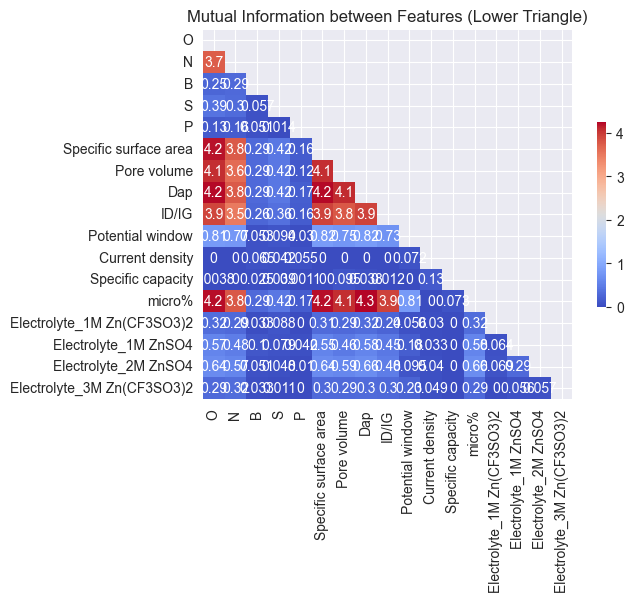

In [9]:
# 作图
mask = np.triu(np.ones_like(mi_mat, dtype=bool))
sns.heatmap(mi_mat, mask=mask, cmap='coolwarm', annot=True, square=True, cbar_kws={'shrink': .5})
plt.title('Mutual Information between Features (Lower Triangle)')
plt.show()